In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import the dataset after copying it to the local VM

In [2]:
! cp -r /content/gdrive/MyDrive/PGSS2022/PGSS2023/Week02/IMDB\ Dataset.csv /content/

In [40]:
import pandas as pd
df = pd.read_csv("/content/IMDB Dataset.csv")

In [41]:
# Distribution of each type of review
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [42]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Learn to classify the text based on the sentiment response

## Cleanse the text data to remove things that wouldn't have any bearing on sentiment

In [43]:
# Convert all words to lowercase
df["review"] = df["review"].str.lower()

# Remove HTML tags using Beautiful soup
from bs4 import BeautifulSoup
df["review"] = df["review"].apply(lambda review: BeautifulSoup(review, "lxml").text)

# Remove urls
# From https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
import re
df["review"] = df["review"].apply(lambda review: re.sub(r'^https?:\/\/.*[\r\n]*', '', review, flags=re.MULTILINE))
df["review"] = df["review"].apply(lambda review: re.sub(r'^http?:\/\/.*[\r\n]*', '', review, flags=re.MULTILINE))

df.head()

<ipython-input-43-550c0fb5bf1e>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["review"] = df["review"].apply(lambda review: BeautifulSoup(review, "lxml").text)


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [44]:
!pip install contractions

In [45]:
# Remove Contractions
import contractions
df["review"] = df["review"].apply(lambda review: contractions.fix(review))
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i am going to have to disagree with the previo...,negative


## Create word clouds to get a birds-eye view of the data given

In [9]:
#Create Word Cloud
from wordcloud import WordCloud, STOPWORDS

all_reviews = " "
positive_reviews = " "
negative_reviews =  ""

stopwords = set(STOPWORDS)


positive_df = df[df["sentiment"]  == "positive"]
negative_df = df[df["sentiment"]  == "negative"]

for review in positive_df.review:
    # Tokenize the review
    tokens = review.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    all_reviews += " ".join(tokens)+" "
    positive_reviews  += " ".join(tokens)+" "

for review in negative_df.review:
    # Tokenize the review
    tokens = review.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    all_reviews += " ".join(tokens)+" "
    negative_reviews  += " ".join(tokens)+" "


In [10]:
type(all_reviews)

str

In [11]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_reviews)


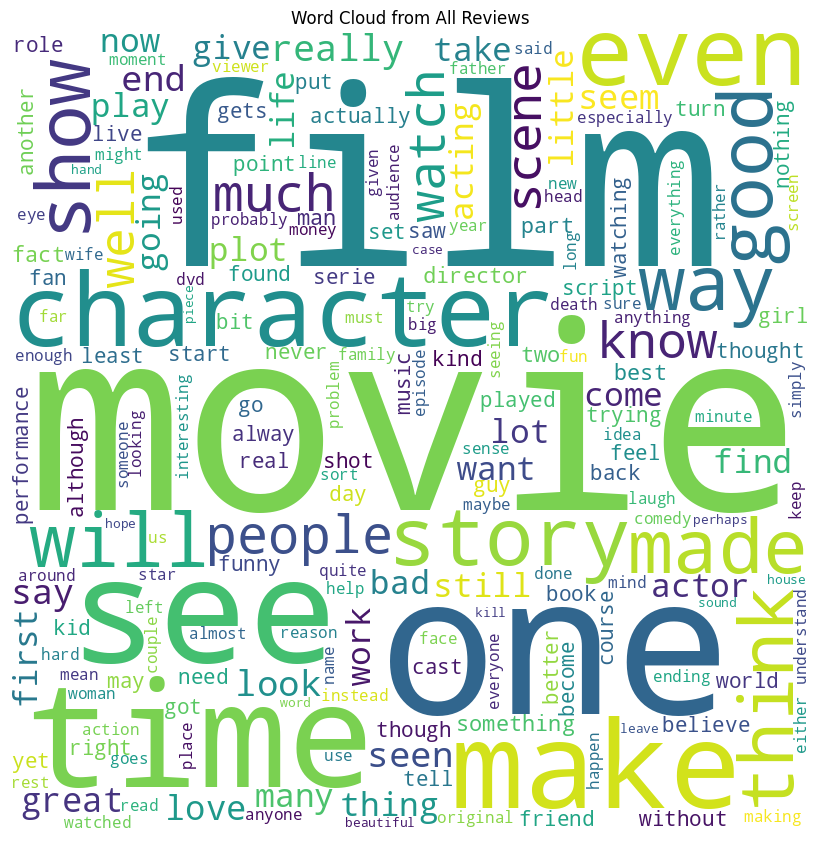

In [12]:
# plot the WordCloud image

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud from All Reviews")
plt.show()


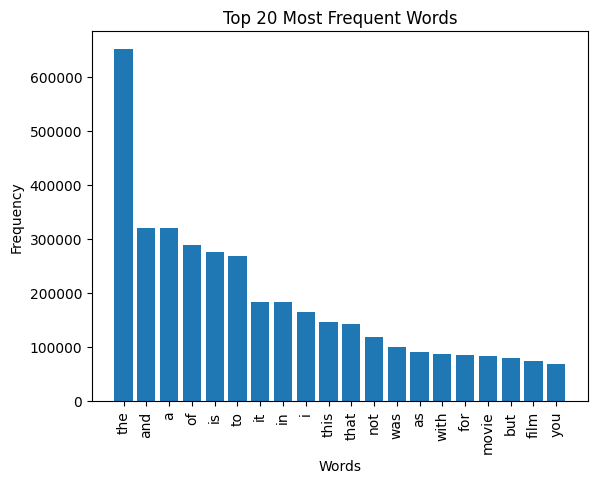

In [13]:
import re
from collections import Counter
import matplotlib.pyplot as plt


def create_barplot(string, k):
    # Step 1: Convert string to list of words
    words = string.split()

    # Step 2: Remove punctuation and special characters
    words = [re.sub(r'[^\w\s]', '', word) for word in words]

    # Step 3: Convert all words to lowercase
    words = [word.lower() for word in words]

    # Step 4: Count frequency of each word using dictionary
    word_counts = Counter(words)

    # Step 5: Sort dictionary by value in descending order and limit to top k
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:k])

    # Step 6: Create barplot using matplotlib
    plt.bar(sorted_word_counts.keys(), sorted_word_counts.values())
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {k} Most Frequent Words')
    plt.show()

k = 20

create_barplot(all_reviews, k)

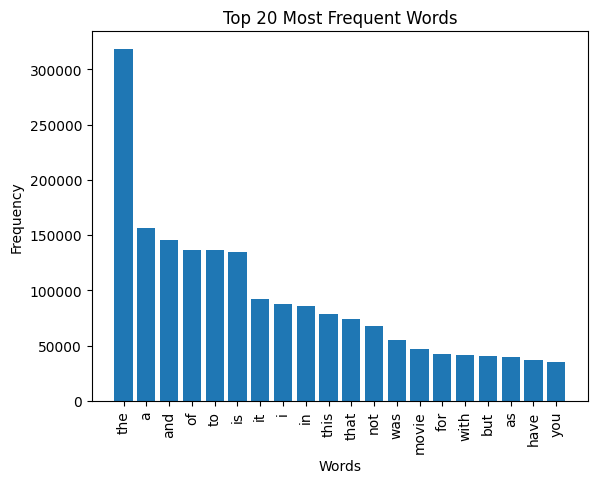

In [14]:
k = 20

create_barplot(negative_reviews, k)

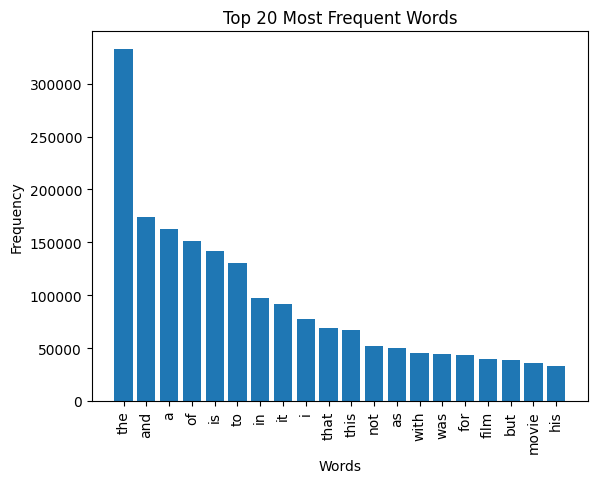

In [15]:
k = 20

create_barplot(positive_reviews, k)

In [16]:
# Define a function to count the number of words in a string
def count_words(text):
    return len(text.split())

# Apply the function to the reviews column using apply method
df['num_words'] = df['review'].apply(count_words)

# Create a new column in the dataframe with the number of words
df.head()

,review,sentiment,num_words
0,one of the other reviewers has mentioned that ...,positive,308
1,a wonderful little production. the filming tec...,positive,156
2,i thought this was a wonderful way to spend ti...,positive,164
3,basically there is a family where a little boy...,negative,135
4,"petter mattei's ""love in the time of money"" is...",positive,222


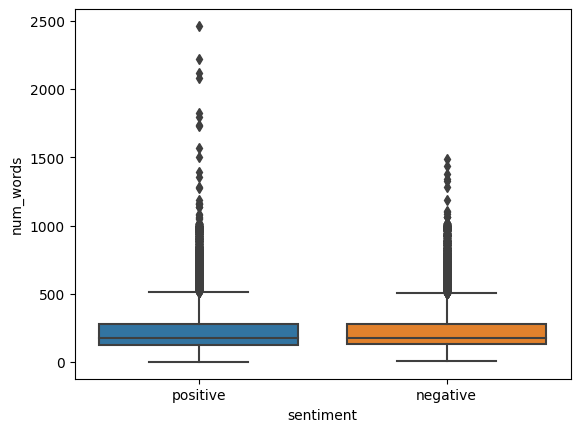

In [18]:
import seaborn as sns

#  Create a grouped boxplot using seaborn's boxplot function
sns.boxplot(data=df, x='sentiment', y='num_words')

# Display the plot
plt.show()

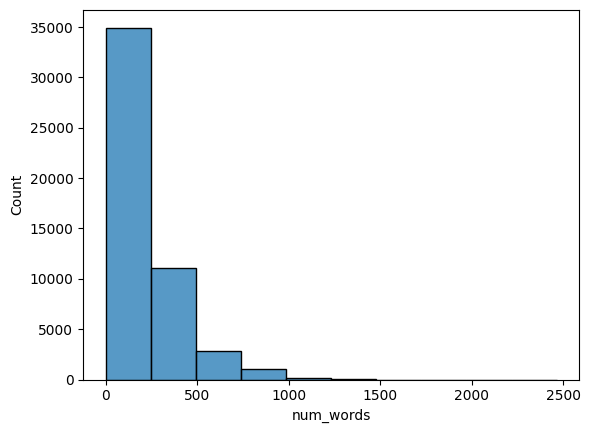

In [19]:
import seaborn as sns

# Create a histogram using seaborn's histplot function
sns.histplot(data=df, x='num_words', bins=10)

# Display the plots
plt.show()

<Axes: xlabel='num_words', ylabel='Density'>

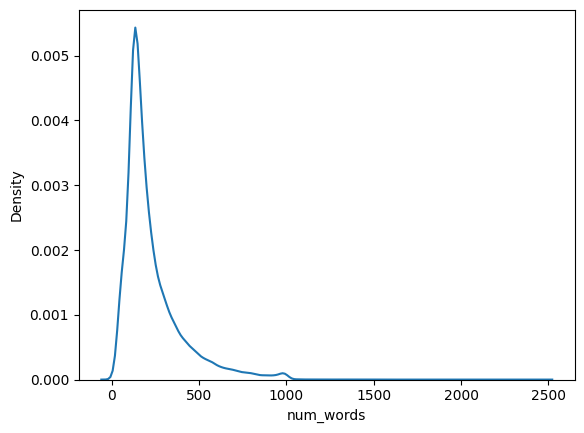

In [20]:

# Create a KDE plot using seaborn's kdeplot function
sns.kdeplot(data=df, x='num_words')


## Create new numerical features in addition to the num_words, using sentence transformers to embed the text into fixed-length numerical representations

In [ ]:
! pip install sentence-transformers

In [57]:
# Create a stratified random sample of df
strata = df['sentiment'].unique()

# Calculate the size of the sample for each stratum
sample_size = 1000
sample_sizes = {s: sample_size for s in strata}

# Use pandas' groupby method to group the dataframe by the sentiment column
groups = df.groupby('sentiment')

# Use pandas' apply method to sample each group based on the size of the sample for that stratum
samples = groups.apply(lambda x: x.sample(n=sample_sizes[x.name])).reset_index(drop=True)

# Concatenate the sampled groups into a single dataframe
sampled_df = pd.concat([samples])

sampled_df

,review,sentiment
0,this movie was the worst i have ever seen.it d...,negative
1,i have really enjoyed several movies by gérard...,negative
2,i do not understand why people would praise th...,negative
3,"when i saw the commercial for this, i was all ...",negative
4,"this movie was awful, plain and simple. it wil...",negative
...,...,...
1995,robert altman should not make a movie like thi...,positive
1996,"this short was in part four of the ""short cine...",positive
1997,moonwalker is absolutely incredible !!!!!!! wh...,positive
1998,strange but acceptable mob comedy that has an ...,positive


In [58]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
# model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('bert-base-nli-mean-tokens', device='cuda')

# Define a function to embed the text using the sentence transformer model
def embed_text(text):
    embeddings = model.encode(text)
    return embeddings.tolist()

# Apply the function to the reviews column using apply method
sampled_df['embeddings'] = sampled_df['review'].apply(embed_text)

sampled_df

,review,sentiment,embeddings
0,this movie was the worst i have ever seen.it d...,negative,"[0.05550388991832733, 1.0574488639831543, 0.33..."
1,i have really enjoyed several movies by gérard...,negative,"[-0.5791711211204529, 0.5770217776298523, 0.42..."
2,i do not understand why people would praise th...,negative,"[0.23173710703849792, 0.9884452819824219, -0.0..."
3,"when i saw the commercial for this, i was all ...",negative,"[0.5883431434631348, 0.8163905739784241, 0.467..."
4,"this movie was awful, plain and simple. it wil...",negative,"[-0.3537050485610962, 1.0110671520233154, 0.10..."
...,...,...,...
1995,robert altman should not make a movie like thi...,positive,"[-0.4772285223007202, 0.35762205719947815, 0.3..."
1996,"this short was in part four of the ""short cine...",positive,"[0.17780348658561707, 0.3458450436592102, 0.80..."
1997,moonwalker is absolutely incredible !!!!!!! wh...,positive,"[-0.10836166143417358, 0.8950332403182983, 0.4..."
1998,strange but acceptable mob comedy that has an ...,positive,"[-0.6419013738632202, 0.32738175988197327, 0.1..."


In [59]:
# Verify that the GPU is being used
print(model.device)

cuda:0


In [60]:
df_embeddings = pd.DataFrame(list(sampled_df['embeddings']))

sampled_df = pd.concat([sampled_df, df_embeddings], axis=1)
sampled_df.drop(['embeddings'], axis=1, inplace=True)

# sampled_df = sampled_df[['sentiment', 'num_words', 0, 1, ..., 767]]

sampled_df

,review,sentiment,0,1,2,3,4,5,6,7,...,758,759,760,761,762,763,764,765,766,767
0,this movie was the worst i have ever seen.it d...,negative,0.055504,1.057449,0.336736,0.093005,-0.309781,-0.404501,1.960187,0.358526,...,-0.056833,0.148521,-0.793002,-1.932948,-0.169773,-0.177232,0.048647,0.571219,0.272020,0.112541
1,i have really enjoyed several movies by gérard...,negative,-0.579171,0.577022,0.420307,0.251190,-0.661549,-0.553379,1.318622,0.043568,...,-0.714807,-0.756918,-0.870854,-2.970480,-0.058797,-0.487314,0.333420,0.845254,0.215761,0.306487
2,i do not understand why people would praise th...,negative,0.231737,0.988445,-0.021227,0.229814,-0.279851,-0.359828,1.396466,-0.095807,...,-0.224375,-0.067962,-0.974402,-1.334118,-0.292511,-0.437321,-0.189049,-0.053471,-0.104681,0.140722
3,"when i saw the commercial for this, i was all ...",negative,0.588343,0.816391,0.467667,0.023917,-0.301316,-0.582048,1.442800,0.090943,...,0.093892,-0.649956,-0.967877,-1.888077,0.019052,-0.457105,-0.094158,0.898629,0.198199,0.002483
4,"this movie was awful, plain and simple. it wil...",negative,-0.353705,1.011067,0.101272,0.190831,-0.633900,-0.774804,0.838080,0.467802,...,-0.064236,-0.918549,-1.082179,-2.506960,0.150200,-0.006476,-0.150466,0.684587,0.409222,0.266896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,robert altman should not make a movie like thi...,positive,-0.477229,0.357622,0.352501,0.338393,0.020808,-0.458621,0.829763,-0.400033,...,-0.454885,-0.804636,-1.126807,-1.839008,-0.443813,-0.348848,0.017252,0.031058,0.040166,0.052179
1996,"this short was in part four of the ""short cine...",positive,0.177803,0.345845,0.808715,0.173096,-0.218945,-0.761786,0.815035,0.259788,...,-0.384682,-0.750051,-1.641405,-1.363187,-0.081270,-0.905235,0.081500,1.040601,0.370846,0.132667
1997,moonwalker is absolutely incredible !!!!!!! wh...,positive,-0.108362,0.895033,0.411702,-0.095808,0.201680,-1.351033,-0.012216,0.250123,...,-0.844393,-0.613477,-0.150304,-1.118484,-0.280059,-0.993848,-0.109909,-0.032760,0.171438,-0.234608
1998,strange but acceptable mob comedy that has an ...,positive,-0.641901,0.327382,0.121448,-0.064023,-0.239469,-0.137678,0.991805,-0.548962,...,-0.657177,-0.640726,-1.395749,-1.987242,-0.126938,-0.621944,0.452302,0.110078,0.181061,0.103377


In [61]:
modelReadDataset = sampled_df.drop(['review'], axis=1)
modelReadDataset['sentiment'] = modelReadDataset['sentiment'].astype('category')
modelReadDataset

,sentiment,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,negative,0.055504,1.057449,0.336736,0.093005,-0.309781,-0.404501,1.960187,0.358526,0.551918,...,-0.056833,0.148521,-0.793002,-1.932948,-0.169773,-0.177232,0.048647,0.571219,0.272020,0.112541
1,negative,-0.579171,0.577022,0.420307,0.251190,-0.661549,-0.553379,1.318622,0.043568,0.563645,...,-0.714807,-0.756918,-0.870854,-2.970480,-0.058797,-0.487314,0.333420,0.845254,0.215761,0.306487
2,negative,0.231737,0.988445,-0.021227,0.229814,-0.279851,-0.359828,1.396466,-0.095807,0.422874,...,-0.224375,-0.067962,-0.974402,-1.334118,-0.292511,-0.437321,-0.189049,-0.053471,-0.104681,0.140722
3,negative,0.588343,0.816391,0.467667,0.023917,-0.301316,-0.582048,1.442800,0.090943,0.436894,...,0.093892,-0.649956,-0.967877,-1.888077,0.019052,-0.457105,-0.094158,0.898629,0.198199,0.002483
4,negative,-0.353705,1.011067,0.101272,0.190831,-0.633900,-0.774804,0.838080,0.467802,0.969290,...,-0.064236,-0.918549,-1.082179,-2.506960,0.150200,-0.006476,-0.150466,0.684587,0.409222,0.266896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,positive,-0.477229,0.357622,0.352501,0.338393,0.020808,-0.458621,0.829763,-0.400033,0.649474,...,-0.454885,-0.804636,-1.126807,-1.839008,-0.443813,-0.348848,0.017252,0.031058,0.040166,0.052179
1996,positive,0.177803,0.345845,0.808715,0.173096,-0.218945,-0.761786,0.815035,0.259788,0.512854,...,-0.384682,-0.750051,-1.641405,-1.363187,-0.081270,-0.905235,0.081500,1.040601,0.370846,0.132667
1997,positive,-0.108362,0.895033,0.411702,-0.095808,0.201680,-1.351033,-0.012216,0.250123,0.104727,...,-0.844393,-0.613477,-0.150304,-1.118484,-0.280059,-0.993848,-0.109909,-0.032760,0.171438,-0.234608
1998,positive,-0.641901,0.327382,0.121448,-0.064023,-0.239469,-0.137678,0.991805,-0.548962,0.310232,...,-0.657177,-0.640726,-1.395749,-1.987242,-0.126938,-0.621944,0.452302,0.110078,0.181061,0.103377


## Classify the text after converting the response variable into a categorical type

In [66]:
# Create a decision tree to classify sentiment using the remaining columns of modelReadDataset

from sklearn.model_selection import train_test_split

X = modelReadDataset.drop('sentiment', axis=1)
y = modelReadDataset['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [73]:
from sklearn import metrics

y_pred = dt_classifier.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Precision:', metrics.precision_score(y_test, y_pred))
# print('Recall:', metrics.recall_score(y_test, y_pred))
# print('F1 Score:', metrics.f1_score(y_test, y_pred))


Accuracy: 0.6775


In [75]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['negative', 'positive'])
print(report)


              precision    recall  f1-score   support

    negative       0.68      0.66      0.67       199
    positive       0.67      0.70      0.68       201

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400

